In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [2]:
# Define some initial params
# Dimensionality
Dn = 20

# Mutation probability
M = 0.05

# Population size
NP = 500

# No. of generations
G = 200

In [3]:
r = np.random.random((Dn,))
def f(x):
    return ((x + r)**2).sum()

print r

[0.10818542 0.44589692 0.9604618  0.99091493 0.87535251 0.7055326
 0.08733997 0.52947944 0.11087147 0.1071374  0.70167136 0.87764278
 0.67248229 0.77694334 0.42763237 0.13441723 0.95746979 0.60044039
 0.44117576 0.9663292 ]


In [4]:
# Generate population
pop = []

for ix in range(NP):
    # generate a random vector
    vec = np.random.uniform(-1, 1, (Dn,))
    
    # Add to population
    pop.append(vec)

print (pop[0])

[ 0.29219159  0.622855    0.10264787 -0.32825039  0.2860455   0.06719576
 -0.65197787  0.28983614 -0.68900113  0.75753829  0.89536564 -0.69483631
 -0.85264041  0.56646693  0.47828742  0.00427998  0.49113743  0.86769337
  0.88190984  0.04913996]


In [5]:
def crossover(parent_1, parent_2):
    child_1 = np.zeros(parent_1.shape)
    child_2 = np.zeros(parent_2.shape)
    
    dim = int(parent_1.shape[0] / 3.0)
    
    child_1[:dim] = parent_1[:dim]
    child_1[dim:] = parent_2[dim:]
    
    child_2[:dim] = parent_2[:dim]
    child_2[dim:] = parent_1[dim:]
    
    return child_1, child_2

def mutate(x):
    for ix in range(x.shape[0]):
        # Generate a random number for probability
        R = np.random.random()
        
        if R < M:
            # Mutate random index 
            x[ix] = np.random.uniform(-5, 5)
        else:
            pass
    return x

In [14]:
loss = []

# Main Genetic Algo loop
for gx in range(G):
    pop = sorted(pop, key=lambda z: f(z))
    print "Generation: {0} | Best Value: {1}".format(gx, f(pop[0]))
    loss.append(f(pop[0]))
    
    # create a temp population
    temp = []
    
    while not len(temp) == NP:
        # Select 2 parents from good section of population
        p1, p2 = random.sample(pop[:int(NP/2.0)], 2)
        
        # Apply crossover
        c1, c2 = crossover(p1, p2)
        
        # mutate
        c1 = mutate(c1)
        c2 = mutate(c2)
        
        temp.append(c1)
        temp.append(c2)
    
    # create a combined population
    comb = temp + pop
    
    # survival of the fittest
    pop = sorted(comb, key=lambda z: f(z))[:NP]

Generation: 0 | Best Value: 0.0164426030566
Generation: 1 | Best Value: 0.0164426030566
Generation: 2 | Best Value: 0.0141528012894
Generation: 3 | Best Value: 0.0141528012894
Generation: 4 | Best Value: 0.0141528012894
Generation: 5 | Best Value: 0.0141528012894
Generation: 6 | Best Value: 0.0141528012894
Generation: 7 | Best Value: 0.0141528012894
Generation: 8 | Best Value: 0.0132626913352
Generation: 9 | Best Value: 0.0131927188818
Generation: 10 | Best Value: 0.0131927188818
Generation: 11 | Best Value: 0.0126206261722
Generation: 12 | Best Value: 0.0126206261722
Generation: 13 | Best Value: 0.0126206261722
Generation: 14 | Best Value: 0.0126206261722
Generation: 15 | Best Value: 0.0126206261722
Generation: 16 | Best Value: 0.0126206261722
Generation: 17 | Best Value: 0.0119880489111
Generation: 18 | Best Value: 0.0119880489111
Generation: 19 | Best Value: 0.0119880489111
Generation: 20 | Best Value: 0.0111870947598
Generation: 21 | Best Value: 0.0111870947598
Generation: 22 | Bes

Generation: 191 | Best Value: 0.00111526748429
Generation: 192 | Best Value: 0.00111526748429
Generation: 193 | Best Value: 0.00111526748429
Generation: 194 | Best Value: 0.00111526748429
Generation: 195 | Best Value: 0.00111526748429
Generation: 196 | Best Value: 0.000991539479677
Generation: 197 | Best Value: 0.000991539479677
Generation: 198 | Best Value: 0.000991539479677
Generation: 199 | Best Value: 0.000991539479677


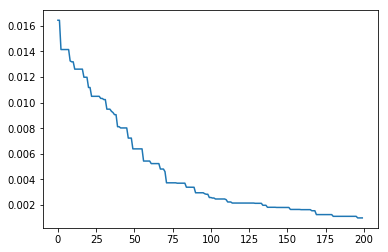

In [15]:
plt.plot(loss)

In [22]:
print pop[0], r

[-0.73712405 -0.78916708 -0.02180353] [0.73727732 0.78918259 0.02296693]
